# **TUGAS 1 - CLUSTERING**

Anggota Kelompok :
- Nisrina Alissy
- Jessica Aurelia.P

Import library

In [ ]:
#Import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest


# EDA

In [ ]:
# Menginput data telco
df = pd.read_csv('/content/telco.csv')
df.head()

,Unnamed: 0,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
0,1,51.333333,77004.666667,172.000000,0.718000,0.990488,0.0,0.0,0.998028,0.0,...,23134.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,19.000000,4.000000,1.000000
1,2,44.000000,37837.333333,26.000000,0.639181,0.807018,0.0,0.0,0.916667,0.0,...,4174.0,0.000000,0.0,0.403361,0.000,0.0,0.348214,5.000000,3.000000,2.000000
2,3,443.000000,218716.666670,260.333333,0.804948,0.997750,0.0,0.0,0.999718,0.0,...,47500.5,0.524698,0.0,0.524698,0.365,0.0,0.365000,15.666667,7.666667,1.000000
3,4,141.333333,138634.000000,128.333333,0.766392,0.940624,0.0,0.0,0.872776,0.0,...,0.0,0.357143,0.0,0.446032,0.250,0.0,0.403704,5.666667,4.333333,1.000000
4,5,681.333333,353258.333330,366.666667,0.820502,0.932896,0.0,0.0,0.826449,0.0,...,70000.0,1.000000,1.0,1.000000,1.000,1.0,1.000000,5.666667,2.666667,1.333333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              50000 non-null  int64  
 1   CDR_VOICE_DRTN_MIN      50000 non-null  float64
 2   REV_VOICE               50000 non-null  float64
 3   CDR_TXN_VOICE           50000 non-null  float64
 4   CDR_RATIO_WORK_VOICE    50000 non-null  float64
 5   CDR_RATIO_VOICE_ONNET   50000 non-null  float64
 6   CDR_RATIO_VOICE_IDD     50000 non-null  float64
 7   CDR_RATIO_VOICE_ROAM    50000 non-null  float64
 8   CDR_RATIO_SMS_ONNET     50000 non-null  float64
 9   CDR_RATIO_SMS_IDD       50000 non-null  float64
 10  CDR_RATIO_SMS_ROAMING   50000 non-null  float64
 11  REV_SMS                 50000 non-null  float64
 12  CDR_TOTAL_DATA_MB       50000 non-null  float64
 13  CDR_RATIO_DATA_WEEKEND  50000 non-null  float64
 14  CDR_RATIO_DATA_3G       50000 non-null

In [ ]:
# Menegecek missing value
df.isna().sum()

,0
Unnamed: 0,0
CDR_VOICE_DRTN_MIN,0
REV_VOICE,0
CDR_TXN_VOICE,0
CDR_RATIO_WORK_VOICE,0
CDR_RATIO_VOICE_ONNET,0
CDR_RATIO_VOICE_IDD,0
CDR_RATIO_VOICE_ROAM,0
CDR_RATIO_SMS_ONNET,0
CDR_RATIO_SMS_IDD,0


In [ ]:
#Cek apakah terdapat duplikat data
df.duplicated().any()

np.False_

In [ ]:
#korelasi variabel utama
df[["REV_VOICE", "REV_SMS", "REV_DATA"]].corr()


,REV_VOICE,REV_SMS,REV_DATA
REV_VOICE,1.000000,0.180118,-0.105760
REV_SMS,0.180118,1.000000,-0.141815
REV_DATA,-0.105760,-0.141815,1.000000


# Preprocessing data

In [ ]:
#menghapus kolom yang tidak relevan
df=df.drop(columns=['Unnamed: 0'])
df.head()

,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,CDR_RATIO_SMS_ROAMING,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
0,51.333333,77004.666667,172.000000,0.718000,0.990488,0.0,0.0,0.998028,0.0,0.0,...,23134.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,19.000000,4.000000,1.000000
1,44.000000,37837.333333,26.000000,0.639181,0.807018,0.0,0.0,0.916667,0.0,0.0,...,4174.0,0.000000,0.0,0.403361,0.000,0.0,0.348214,5.000000,3.000000,2.000000
2,443.000000,218716.666670,260.333333,0.804948,0.997750,0.0,0.0,0.999718,0.0,0.0,...,47500.5,0.524698,0.0,0.524698,0.365,0.0,0.365000,15.666667,7.666667,1.000000
3,141.333333,138634.000000,128.333333,0.766392,0.940624,0.0,0.0,0.872776,0.0,0.0,...,0.0,0.357143,0.0,0.446032,0.250,0.0,0.403704,5.666667,4.333333,1.000000
4,681.333333,353258.333330,366.666667,0.820502,0.932896,0.0,0.0,0.826449,0.0,0.0,...,70000.0,1.000000,1.0,1.000000,1.000,1.0,1.000000,5.666667,2.666667,1.333333


In [ ]:
#ringkasan statistik
df.describe()

,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,CDR_RATIO_SMS_ROAMING,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,333.997703,8.342499e+04,120.899297,0.733704,0.882236,0.003821,0.002507,0.772195,0.007842,0.001623,...,4.891276e+04,0.209734,0.101308,0.404954,0.181358,0.090043,0.378675,7.130740,3.675333,1.086187
std,542.590538,8.164276e+04,154.433260,0.141131,0.196528,0.041535,0.038176,0.255418,0.060520,0.031391,...,8.156402e+04,0.310394,0.248642,0.334208,0.289144,0.231538,0.325839,4.881555,2.439247,0.308524
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.333333,3.119683e+04,29.333333,0.697431,0.854572,0.000000,0.000000,0.642857,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.117647,0.000000,0.000000,0.105123,3.333333,2.000000,1.000000
50%,141.666667,6.588567e+04,71.000000,0.749895,0.970746,0.000000,0.000000,0.862800,0.000000,0.000000,...,8.259167e+03,0.000000,0.000000,0.333333,0.000000,0.000000,0.294872,6.000000,3.000000,1.000000
75%,396.000000,1.097822e+05,151.000000,0.801583,0.997268,0.000000,0.000000,0.981594,0.000000,0.000000,...,7.352200e+04,0.339367,0.000000,0.666667,0.250000,0.000000,0.619051,9.666667,4.666667,1.000000
max,11913.000000,1.914517e+06,3056.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.698044e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.666667,41.666667,6.333333


In [ ]:
# Mengecek multikolinieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

display(vif_data)

,feature,VIF
0,CDR_VOICE_DRTN_MIN,2.260790
1,REV_VOICE,3.569828
2,CDR_TXN_VOICE,3.350602
3,CDR_RATIO_WORK_VOICE,27.639983
4,CDR_RATIO_VOICE_ONNET,34.562317
5,CDR_RATIO_VOICE_IDD,1.107698
6,CDR_RATIO_VOICE_ROAM,1.666900
7,CDR_RATIO_SMS_ONNET,14.165823
8,CDR_RATIO_SMS_IDD,1.105021
9,CDR_RATIO_SMS_ROAMING,1.652733


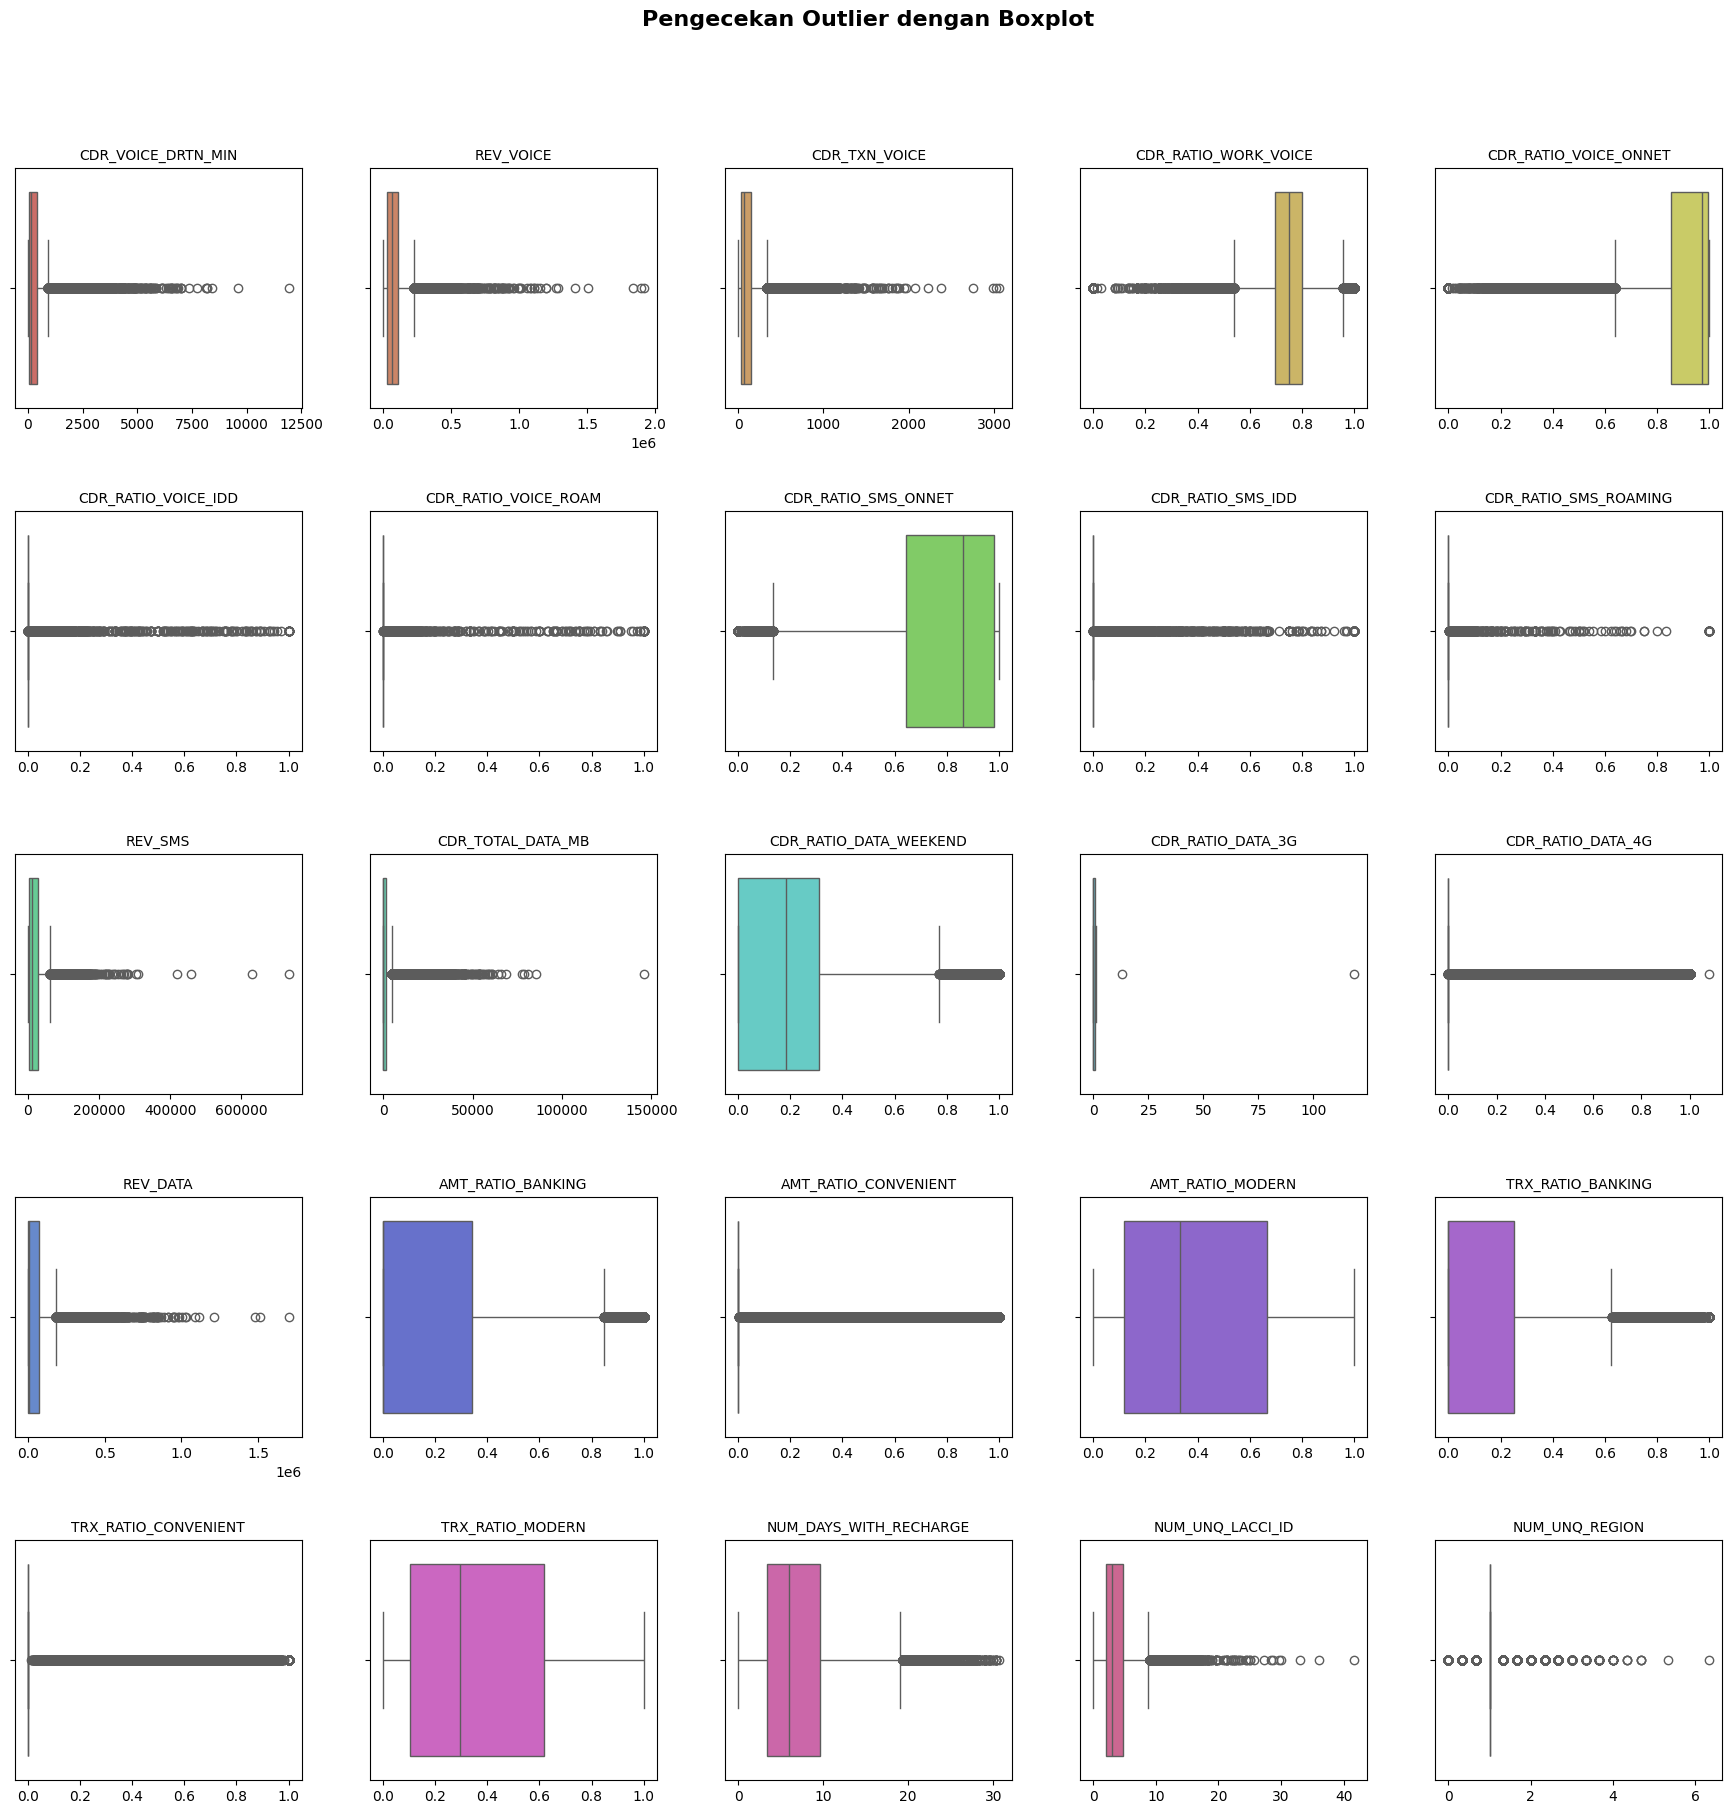

In [ ]:
# Boxplot untuk mengecek outlier (dengan data awal)
kolom_numerik = df.describe().columns[:25]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=df[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()

In [ ]:
# handle outlier
model_if = IsolationForest(contamination='auto', random_state=42)
df['outlier_flag'] = model_if.fit_predict(df)

# Filter: Ambil hanya data 'normal' (flag == 1)
df_cleaned = df[df['outlier_flag'] == 1].drop(columns=['outlier_flag'])
df_cleaned.head()

,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,CDR_RATIO_SMS_ROAMING,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
0,51.333333,77004.666667,172.000000,0.718000,0.990488,0.0,0.0,0.998028,0.0,0.0,...,23134.000000,0.000000,0.0,0.000000,0.000,0.0,0.000000,19.000000,4.000000,1.0
1,44.000000,37837.333333,26.000000,0.639181,0.807018,0.0,0.0,0.916667,0.0,0.0,...,4174.000000,0.000000,0.0,0.403361,0.000,0.0,0.348214,5.000000,3.000000,2.0
2,443.000000,218716.666670,260.333333,0.804948,0.997750,0.0,0.0,0.999718,0.0,0.0,...,47500.500000,0.524698,0.0,0.524698,0.365,0.0,0.365000,15.666667,7.666667,1.0
3,141.333333,138634.000000,128.333333,0.766392,0.940624,0.0,0.0,0.872776,0.0,0.0,...,0.000000,0.357143,0.0,0.446032,0.250,0.0,0.403704,5.666667,4.333333,1.0
5,385.666667,23870.000000,33.333333,0.623482,0.974359,0.0,0.0,0.995651,0.0,0.0,...,26948.333333,0.000000,0.0,0.000000,0.000,0.0,0.000000,12.000000,3.000000,1.0


In [ ]:
# Outlier
outliers = df[df['outlier_flag'] == -1]
print("Outliers detected:\n", outliers)

Outliers detected:
        CDR_VOICE_DRTN_MIN     REV_VOICE  CDR_TXN_VOICE  CDR_RATIO_WORK_VOICE  \
4              681.333333  353258.33333     366.666667              0.820502   
24            3382.333333   32257.00000     125.666667              0.696068   
33              16.500000   18129.00000       7.000000              0.857143   
45            5528.333333  291614.33333     362.000000              0.734894   
55               0.000000       0.00000       0.000000              0.000000   
...                   ...           ...            ...                   ...   
49886           97.666667  166750.00000      76.666667              0.872727   
49916            1.000000    5762.00000       8.000000              0.477273   
49928          627.333333  203404.33333     336.666667              0.742132   
49966            5.333333   10256.00000       7.333333              0.529304   
49999            0.000000       0.00000       0.000000              0.000000   

       CDR_RATIO_VO

In [ ]:
df_cleaned.describe()


,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,CDR_RATIO_SMS_ROAMING,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
count,45634.000000,4.563400e+04,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,...,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000,45634.000000
mean,328.735957,8.047251e+04,118.849378,0.740520,0.901407,0.001602,0.000466,0.788480,0.003561,0.000306,...,39720.463204,0.172508,0.061487,0.369573,0.143968,0.051406,0.342874,7.279229,3.744401,1.082227
std,506.865279,6.910047e+04,141.902825,0.118895,0.165909,0.018656,0.012080,0.239729,0.030797,0.009858,...,64337.021063,0.271607,0.180302,0.312998,0.244831,0.158618,0.302012,4.730899,2.303407,0.287404
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,3.313833e+04,31.666667,0.699791,0.880217,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.105978,0.000000,0.000000,0.094771,3.666667,2.000000,1.000000
50%,147.333333,6.634333e+04,73.000000,0.750000,0.975502,0.000000,0.000000,0.874641,0.000000,0.000000,...,4410.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.265115,6.333333,3.333333,1.000000
75%,398.000000,1.076764e+05,150.666667,0.800258,0.997877,0.000000,0.000000,0.984800,0.000000,0.000000,...,62592.916667,0.277778,0.000000,0.597884,0.200000,0.000000,0.538370,9.666667,4.666667,1.000000
max,11913.000000,1.149560e+06,3021.333333,1.000000,1.000000,1.000000,0.957265,1.000000,1.000000,0.798165,...,955873.333330,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.333333,27.333333,6.333333


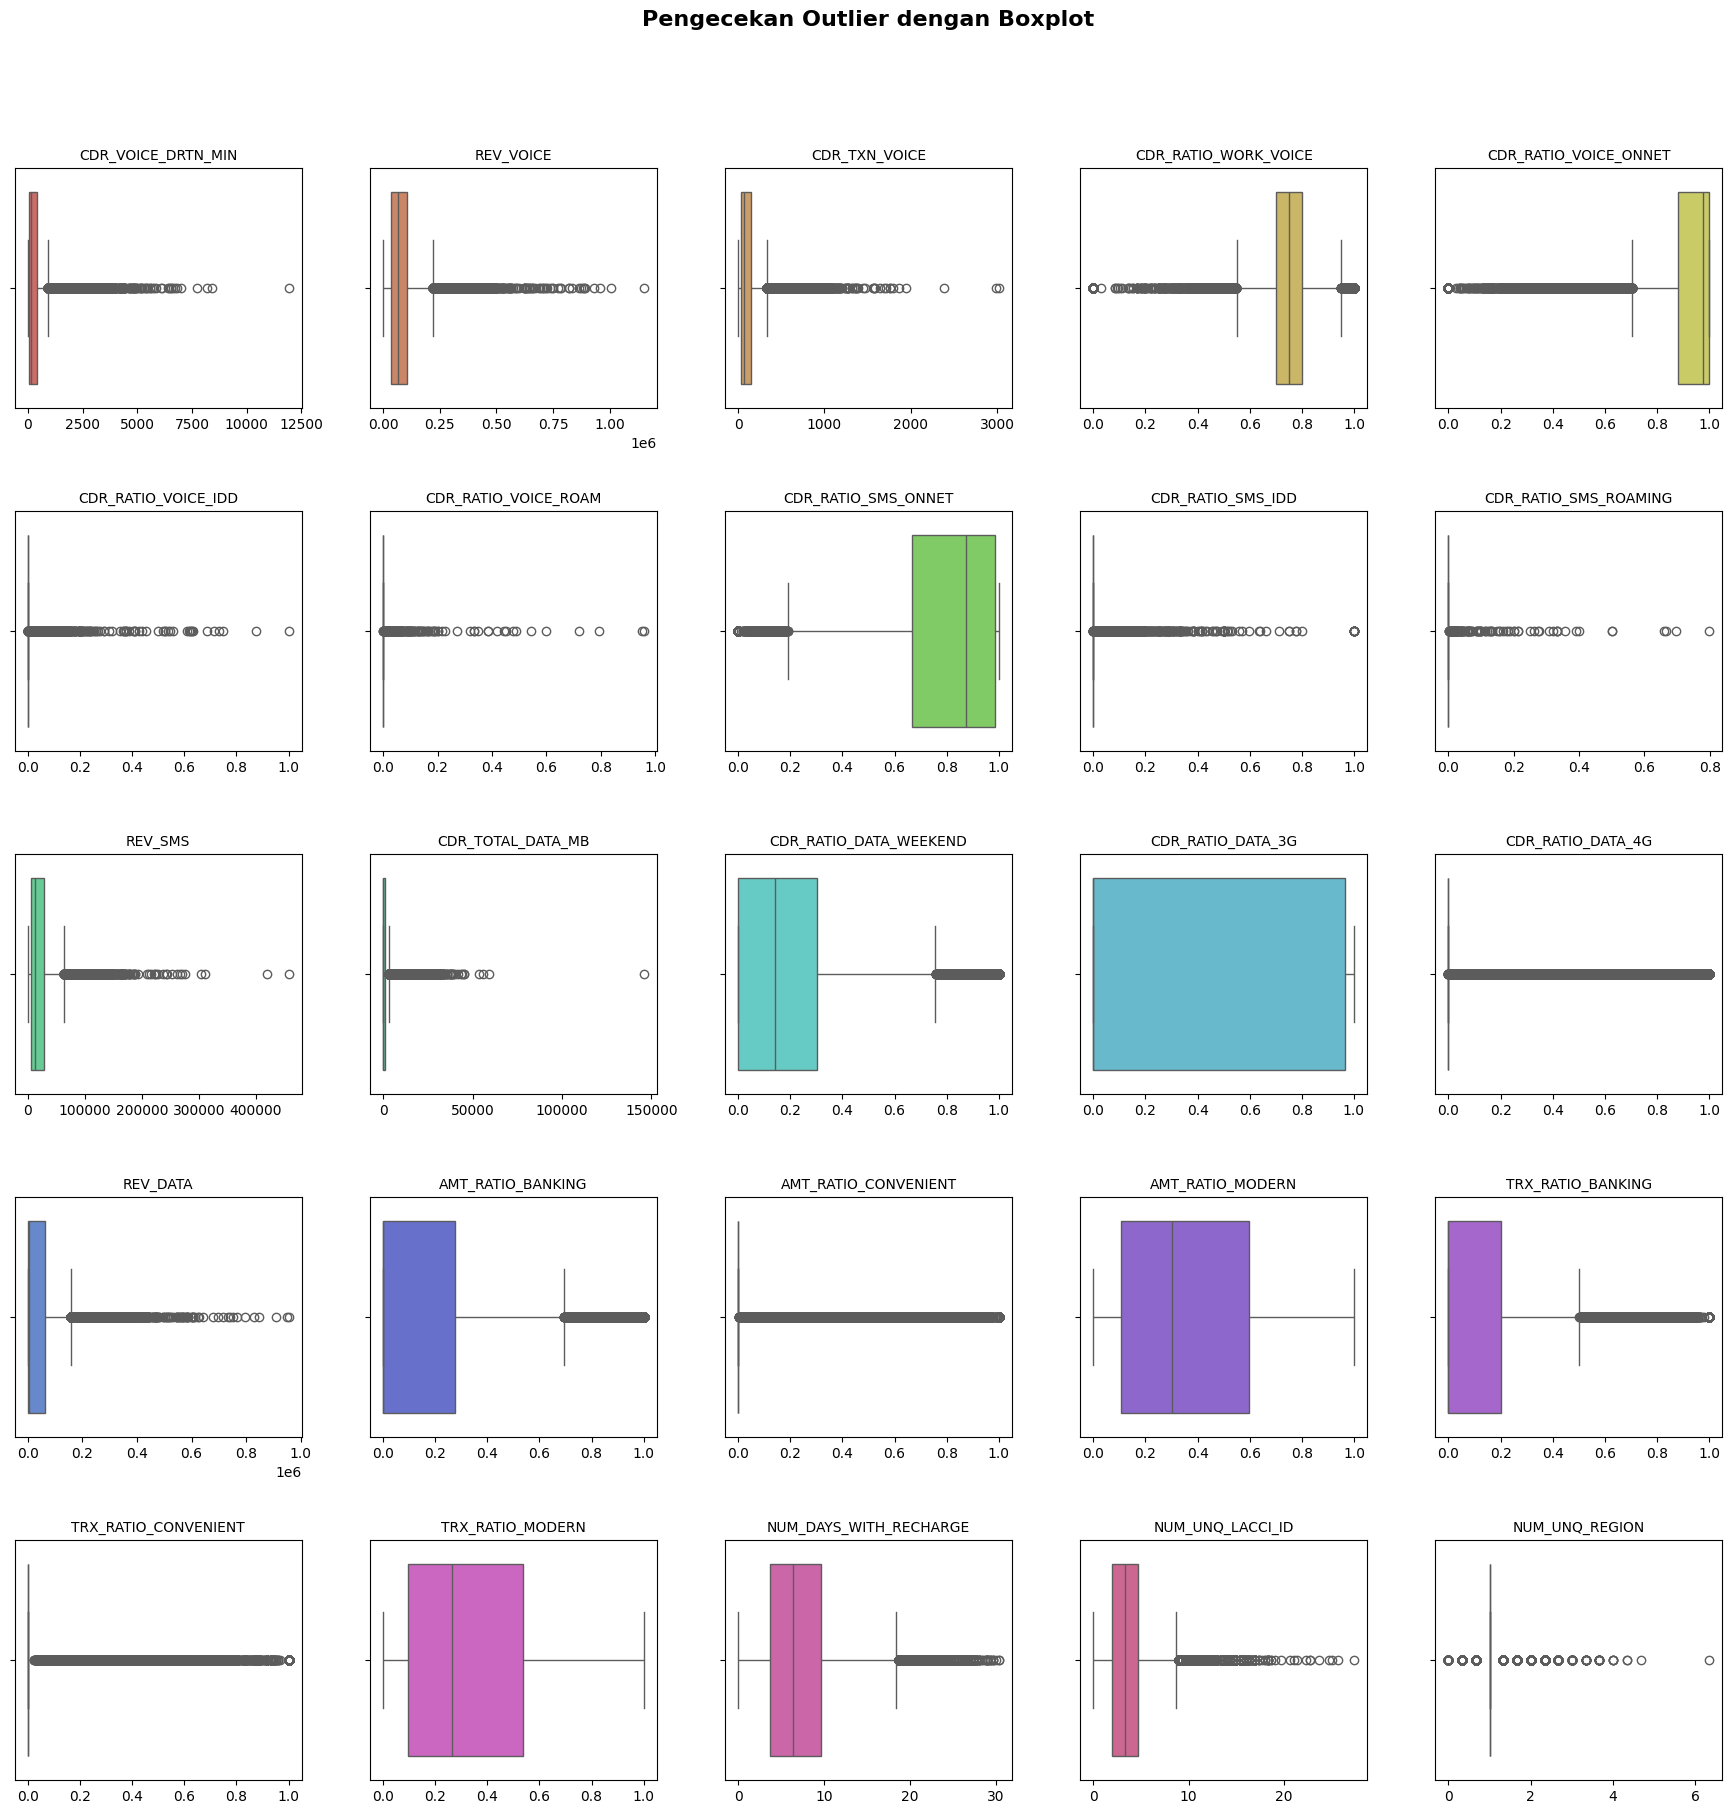

In [ ]:
# Boxplot untuk mengecek outlier (dengan data yang sudah dibersihkan)
kolom_numerik = df_cleaned.describe().columns[:25]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=df_cleaned[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()

transformasi data

In [ ]:
#Standarisasi data
dc = df_cleaned
sc = StandardScaler()
dfstd = sc.fit_transform(dc.astype(float))
dfstd = pd.DataFrame(dfstd, columns=dc.columns)
display(dfstd)


,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,CDR_RATIO_SMS_ROAMING,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
0,-0.547297,-0.050186,0.374561,-0.189414,0.536934,-0.085857,-0.038577,0.874110,-0.115625,-0.031008,...,-0.257809,-0.635144,-0.341028,-1.180764,-0.588036,-0.324092,-1.135310,2.477520,0.110967,-0.286104
1,-0.561765,-0.617009,-0.654324,-0.852348,-0.568931,-0.085857,-0.038577,0.534719,-0.115625,-0.031008,...,-0.552510,-0.635144,-0.341028,0.107952,-0.588036,-0.324092,0.017683,-0.481780,-0.323177,3.193351
2,0.225435,2.000647,0.997059,0.541895,0.580700,-0.085857,-0.038577,0.881163,-0.115625,-0.031008,...,0.120928,1.296705,-0.341028,0.495616,0.902804,-0.324092,0.073263,1.772925,1.702829,-0.286104
3,-0.369733,0.841704,0.066835,0.217607,0.236374,-0.085857,-0.038577,0.351631,-0.115625,-0.031008,...,-0.617388,0.679795,-0.341028,0.244281,0.433087,-0.324092,0.201418,-0.340861,0.255682,-0.286104
4,0.112320,-0.819142,-0.602645,-0.984394,0.439713,-0.085857,-0.038577,0.864195,-0.115625,-0.031008,...,-0.198521,-0.635144,-0.341028,-1.180764,-0.588036,-0.324092,-1.135310,0.997870,-0.323177,-0.286104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45629,-0.257933,0.286492,-0.008335,-0.141260,-1.699194,-0.085857,-0.038577,-1.008423,-0.115625,-0.031008,...,-0.614124,1.697236,4.552775,1.645530,1.284023,3.878910,1.348060,-1.045457,-0.902037,-0.286104
45630,-0.436812,0.917199,-0.440560,-0.050799,-0.897757,0.838310,-0.038577,0.238379,-0.115625,-0.031008,...,-0.617388,2.111617,4.060805,1.709897,2.361876,4.754536,1.899920,-0.693159,-0.467892,0.873714
45631,-0.518360,-1.007903,-0.776474,1.329173,0.506909,-0.085857,-0.038577,0.049293,-0.115625,-0.031008,...,0.385032,-0.635144,-0.341028,-1.180764,-0.588036,-0.324092,-1.135310,-0.622699,-0.467892,-0.286104
45632,-0.488109,0.770150,0.407447,0.348764,0.539030,-0.085857,-0.038577,0.678835,-0.115625,-0.031008,...,-0.617388,-0.109168,-0.341028,0.924649,-0.004537,-0.324092,1.119432,0.152356,-0.178463,-0.286104



# **PCA**

In [41]:

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(dfstd)

print(f"Jumlah dimensi berkurang dari {dc.shape[1]} menjadi {X_pca.shape[1]} (menangkap 90% varians)")

Jumlah dimensi berkurang dari 26 menjadi 16 (menangkap 90% varians)


In [ ]:
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(dfstd)
X_pca.shape[1]

16

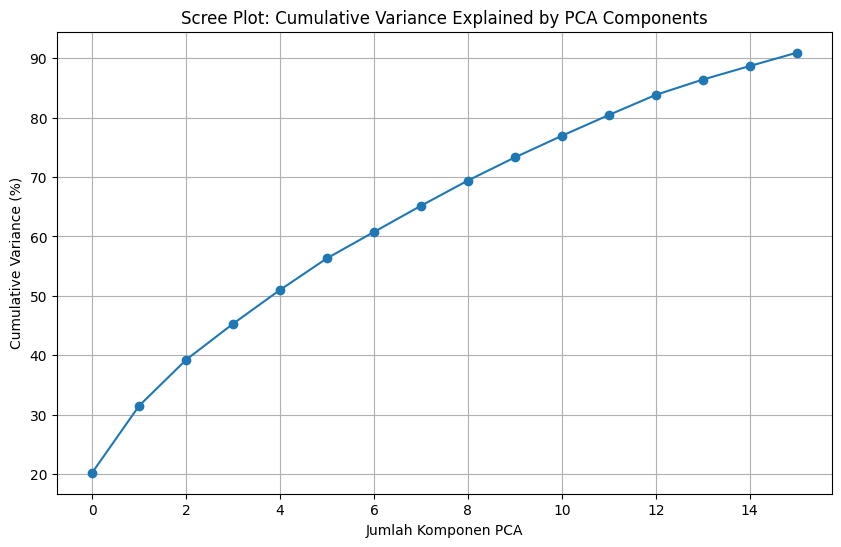

Total variance explained by first 2 components: 31.48%


In [ ]:


# Variance ratio tiap komponen
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_var) * 100, marker='o')
plt.title('Scree Plot: Cumulative Variance Explained by PCA Components')
plt.xlabel('Jumlah Komponen PCA')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True)
plt.show()

print(f"Total variance explained by first 2 components: {np.sum(explained_var[:2]) * 100:.2f}%")


# **Clustering**

k=2 | Silhouette Score: 0.2520
k=3 | Silhouette Score: 0.1288
k=4 | Silhouette Score: 0.1474
k=5 | Silhouette Score: 0.1580
k=6 | Silhouette Score: 0.1589
k=7 | Silhouette Score: 0.1429
k=8 | Silhouette Score: 0.1357
k=9 | Silhouette Score: 0.1326
k=10 | Silhouette Score: 0.1370


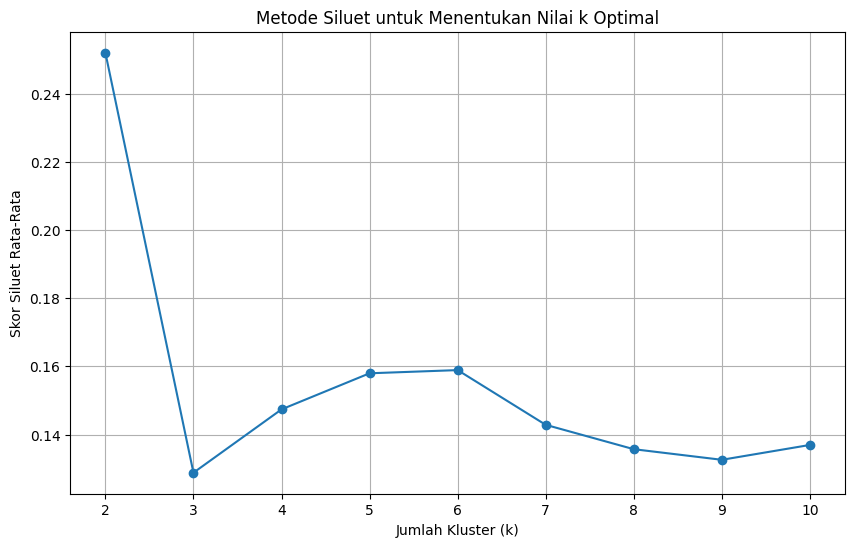

In [ ]:

# 1. Tentukan rentang k yang akan diuji
k_range = range(2, 11) # Umumnya dimulai dari k=2
silhouette_scores = []

# 2. Iterasi untuk setiap nilai k
for k in k_range:
    # Inisialisasi dan latih model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Hitung Skor Siluet
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)
    print(f"k={k} | Silhouette Score: {score:.4f}")

# 3. Visualisasi untuk menentukan k optimal
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Metode Siluet untuk Menentukan Nilai k Optimal')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Skor Siluet Rata-Rata')
plt.grid(True)
plt.savefig('silhouette_scores.png')

In [ ]:
from sklearn.cluster import KMeans

# Ganti 'k_optimal' dengan nilai yang Anda temukan dari plot Siluet
k_optimal = 2

# 1. Latih model dengan k optimal
final_kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_pca)

# 2. Tambahkan label cluster ke data PCA Anda
# Catatan: Asumsi X_pca adalah DataFrame atau diubah ke DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_pca_df['Cluster'] = cluster_labels


In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette=sns.color_palette('tab10', n_colors=k_optimal),
    data=X_pca_df,
    legend='full',
    alpha=0.6
)
plt.title(f'Hasil K-Means Clustering pada Data PCA (k={k_optimal})')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.savefig('pca_cluster_result.png')


In [ ]:
# Gabungkan label cluster ke DataFrame fitur ASLI Anda (X)
dc['Cluster'] = cluster_labels # Diasumsikan cluster_labels adalah hasil final_kmeans.labels_

# Rata-rata setiap fitur untuk setiap cluster
cluster_profile = dc.groupby('Cluster').mean()

print("\n## Profil Rata-Rata Fitur Asli per Cluster:")
print(cluster_profile)


## Profil Rata-Rata Fitur Asli per Cluster:
         CDR_VOICE_DRTN_MIN     REV_VOICE  CDR_TXN_VOICE  \
Cluster                                                    
0                379.972439  85232.317287     134.113909   
1                187.343865  67337.355454      76.725408   

         CDR_RATIO_WORK_VOICE  CDR_RATIO_VOICE_ONNET  CDR_RATIO_VOICE_IDD  \
Cluster                                                                     
0                    0.737517               0.923482             0.001893   
1                    0.748807               0.840490             0.000797   

         CDR_RATIO_VOICE_ROAM  CDR_RATIO_SMS_ONNET  CDR_RATIO_SMS_IDD  \
Cluster                                                                 
0                    0.000145             0.812795           0.002807   
1                    0.001351             0.721382           0.005640   

         CDR_RATIO_SMS_ROAMING  ...      REV_DATA  AMT_RATIO_BANKING  \
Cluster                         ...     

In [ ]:
cluster_profile[['REV_DATA', 'REV_SMS', 'REV_VOICE']]

,REV_DATA,REV_SMS,REV_VOICE
Cluster,,,
0,26253.755976,23466.693814,85232.317287
1,76883.160955,12317.360754,67337.355454


<Figure size 1000x600 with 0 Axes>

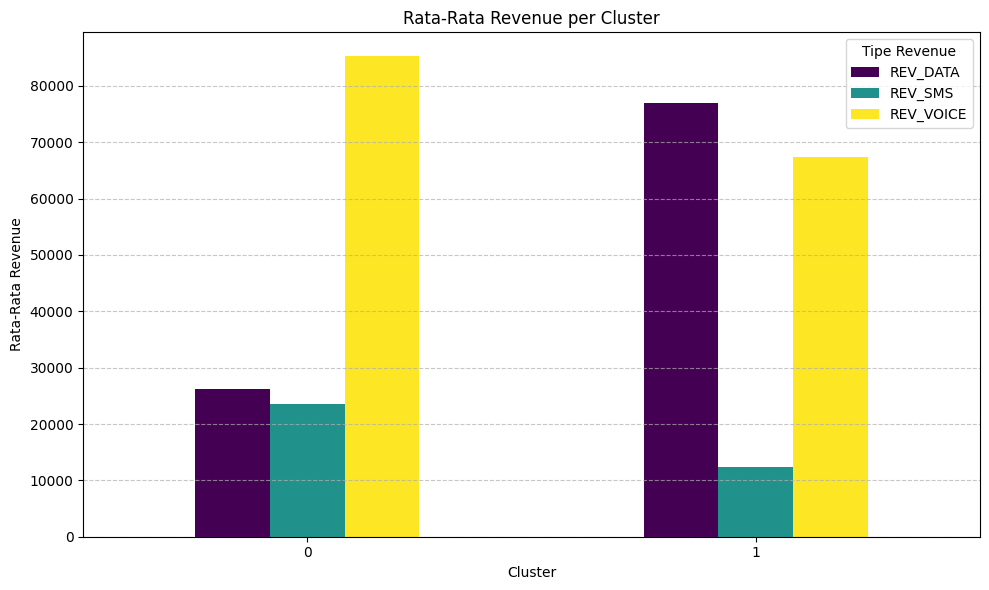

In [ ]:
# Untuk melihat rata-rata venue per klaster
# Pilih hanya variabel utama
features = ['REV_DATA', 'REV_SMS', 'REV_VOICE']

plt.figure(figsize=(10, 6))
cluster_profile[features].plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Rata-Rata Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-Rata Revenue')
plt.xticks(rotation=0)
plt.legend(title='Tipe Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
#diagnostik
count = dc['Cluster'].value_counts()
percent = dc['Cluster'].value_counts(normalize=True) * 100
cluster_summary = pd.DataFrame({
    'Count': count,
    'Percent (%)': percent.round(2) # Membulatkan persentase menjadi 2 desimal
})

print(cluster_summary)

         Count  Percent (%)
Cluster                    
0        33496         73.4
1        12138         26.6


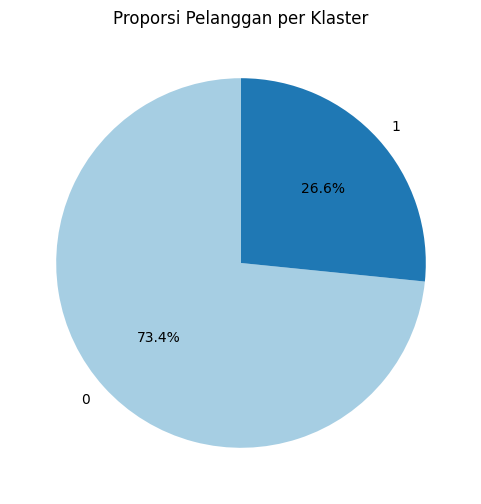

In [ ]:
plt.figure(figsize=(6,6))
cluster_summary['Percent (%)'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    ylabel=''  # Hilangkan label default
)
plt.title('Proporsi Pelanggan per Klaster')
plt.show()


In [ ]:
# Dapatkan lokasi centroid
centroids = final_kmeans.cluster_centers_

# Tampilkan lokasi centroid
print("\n## Lokasi Centroid (dalam Ruang PCA):")
# PC1, PC2...
for i, c in enumerate(centroids):
    print(f"Cluster {i}: PC1={c[0]:.2f}, PC2={c[1]:.2f}")


## Lokasi Centroid (dalam Ruang PCA):
Cluster 0: PC1=-1.09, PC2=-0.17
Cluster 1: PC1=3.47, PC2=0.54


# eval model

In [ ]:
#CHI
from sklearn.metrics import calinski_harabasz_score # Import fungsi yang diperlukan

#
X = dfstd
max_k = 10

# --- Persiapan untuk CHI Score ---
chi_scores = {}

# Loop melalui k dari 2 hingga max_k
for k in range(2, max_k + 1):
    # 1. Latih Model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # 2. Dapatkan Label Cluster
    labels = kmeans.fit_predict(X)

    # 3. Hitung Calinski-Harabasz Index (CHI)
    chi = calinski_harabasz_score(X, labels)

    # Simpan Hasil
    chi_scores[k] = chi

    print(f"k={k} | Calinski-Harabasz Score: {chi:.0f}")

k=2 | Calinski-Harabasz Score: 2086
k=3 | Calinski-Harabasz Score: 5322
k=4 | Calinski-Harabasz Score: 4700
k=5 | Calinski-Harabasz Score: 4254
k=6 | Calinski-Harabasz Score: 3735
k=7 | Calinski-Harabasz Score: 3486
k=8 | Calinski-Harabasz Score: 3640
k=9 | Calinski-Harabasz Score: 3575
k=10 | Calinski-Harabasz Score: 3388


In [ ]:
#DBI
from sklearn.metrics import davies_bouldin_score
X = dfstd
max_k = 10
# Loop melalui k dari 2 hingga max_k
for k in range(2, max_k + 1):
    # 1. Latih Model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # 2. Dapatkan Label Cluster
    labels = kmeans.fit_predict(X)

    # 3. Hitung Davies-Bouldin Index (DBI)
    dbi = davies_bouldin_score(X, labels)

    # Simpan Hasil
    dbi_scores[k] = dbi

    print(f"k={k} | Davies-Bouldin Score: {dbi:.4f}")

k=2 | Davies-Bouldin Score: 0.7586
k=3 | Davies-Bouldin Score: 2.2501
k=4 | Davies-Bouldin Score: 2.1526
k=5 | Davies-Bouldin Score: 2.1089
k=6 | Davies-Bouldin Score: 2.0211
k=7 | Davies-Bouldin Score: 2.0949
k=8 | Davies-Bouldin Score: 1.8692
k=9 | Davies-Bouldin Score: 1.8082
k=10 | Davies-Bouldin Score: 1.7529
